# Customer Segmentation using Clustering Algorithms

## Objective
Membangun **pipeline machine learning end-to-end untuk clustering task**. Mengelompokkan customers berdasarkan **spending dan payment behavior** menggunakan unsupervised learning.

## Workflow
1. Load dan Exploratory Data Analysis (EDA)
2. Data Cleaning dan Preprocessing
3. Feature Scaling
4. Clustering dengan K-Means (model sederhana)
5. Evaluasi dan interpretasi cluster
6. Visualisasi hasil clustering

## Dataset
- **File**: clusteringmidterm.csv
- **Deskripsi**: Data penggunaan kartu kredit dan perilaku pembayaran customer
- **Fitur**: Balance, Purchases, Cash Advance, Payment behavior, dll

## 1. Import Libraries

In [2]:
# Data manipulation
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8-darkgrid')

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Clustering algorithms
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

# Evaluation metrics
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Dimensionality reduction
from sklearn.decomposition import PCA

# Set random seed
np.random.seed(42)

print("✓ All libraries imported successfully!")

✓ All libraries imported successfully!


## 2. Load and Explore Dataset

In [3]:
# Load dataset
df = pd.read_csv('datasets/clustering/clusteringmidterm.csv')

print("="*80)
print("DATASET INFORMATION")
print("="*80)
print(f"Shape: {df.shape}")
print(f"\nColumn names and types:")
print(df.dtypes)
print(f"\n{'='*80}")
print("First 5 rows:")
print(df.head())
print(f"\n{'='*80}")
print("Statistical Summary:")
print(df.describe())
print(f"\n{'='*80}")
print(f"Missing values:")
print(df.isnull().sum())
print(f"\nTotal missing: {df.isnull().sum().sum()}")

DATASET INFORMATION
Shape: (8950, 18)

Column names and types:
CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

First 5 rows:
  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182 

## 3. Data Visualization (EDA)

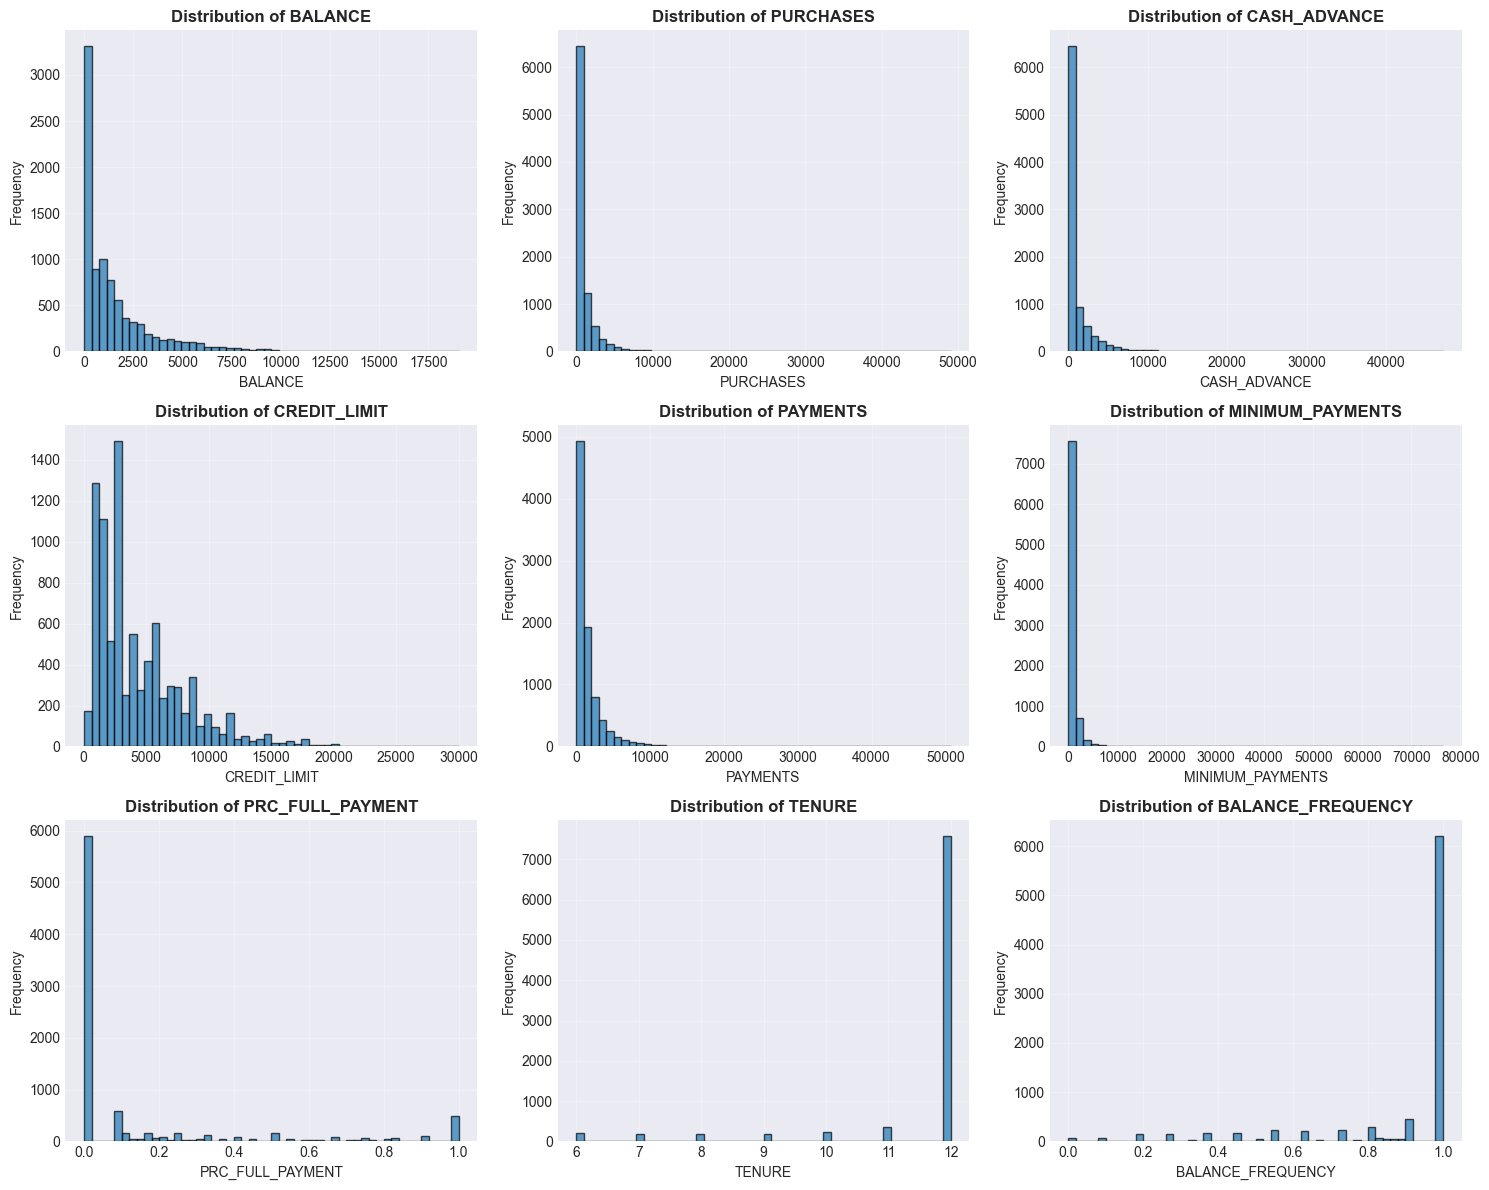

✓ Visualized distributions of 9 key features


In [4]:
# Select numeric columns (exclude CUST_ID)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'CUST_ID' in numeric_cols:
    numeric_cols.remove('CUST_ID')

# Visualize distributions of key features
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

key_features = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 
                'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 
                'TENURE', 'BALANCE_FREQUENCY']

for idx, col in enumerate(key_features):
    if col in df.columns:
        axes[idx].hist(df[col].dropna(), bins=50, edgecolor='black', alpha=0.7)
        axes[idx].set_title(f'Distribution of {col}', fontweight='bold')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Frequency')
        axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"✓ Visualized distributions of {len(key_features)} key features")

## 4. Data Preprocessing

In [5]:
# Create working copy
df_clean = df.copy()

# Drop CUST_ID (not a feature)
if 'CUST_ID' in df_clean.columns:
    df_clean = df_clean.drop('CUST_ID', axis=1)
    print("✓ Dropped CUST_ID column")

print(f"\nDataset shape after dropping ID: {df_clean.shape}")

# Handle missing values
print(f"\nMissing values before imputation:")
print(df_clean.isnull().sum()[df_clean.isnull().sum() > 0])

# Impute with median (robust to outliers)
imputer = SimpleImputer(strategy='median')
df_imputed = pd.DataFrame(
    imputer.fit_transform(df_clean),
    columns=df_clean.columns
)

print(f"\nMissing values after imputation: {df_imputed.isnull().sum().sum()}")
print("✓ Missing values handled")

# Feature Scaling (important for K-Means!)
scaler = StandardScaler()
df_scaled = pd.DataFrame(
    scaler.fit_transform(df_imputed),
    columns=df_imputed.columns
)

print("\n✓ Features scaled using StandardScaler")
print(f"Final preprocessed shape: {df_scaled.shape}")
print(f"Number of features: {df_scaled.shape[1]}")
print(f"Number of samples: {df_scaled.shape[0]}")

✓ Dropped CUST_ID column

Dataset shape after dropping ID: (8950, 17)

Missing values before imputation:
CREDIT_LIMIT          1
MINIMUM_PAYMENTS    313
dtype: int64

Missing values after imputation: 0
✓ Missing values handled

✓ Features scaled using StandardScaler
Final preprocessed shape: (8950, 17)
Number of features: 17
Number of samples: 8950


## 5. Determine Optimal Number of Clusters

Testing different numbers of clusters...

k=2: Inertia=127784.53, Silhouette=0.2100, Davies-Bouldin=1.9120
k=2: Inertia=127784.53, Silhouette=0.2100, Davies-Bouldin=1.9120
k=3: Inertia=111975.04, Silhouette=0.2510, Davies-Bouldin=1.5920
k=3: Inertia=111975.04, Silhouette=0.2510, Davies-Bouldin=1.5920
k=4: Inertia=99061.94, Silhouette=0.1977, Davies-Bouldin=1.5748
k=4: Inertia=99061.94, Silhouette=0.1977, Davies-Bouldin=1.5748
k=5: Inertia=91490.50, Silhouette=0.1931, Davies-Bouldin=1.5492
k=5: Inertia=91490.50, Silhouette=0.1931, Davies-Bouldin=1.5492
k=6: Inertia=84826.59, Silhouette=0.2029, Davies-Bouldin=1.5064
k=6: Inertia=84826.59, Silhouette=0.2029, Davies-Bouldin=1.5064
k=7: Inertia=79856.16, Silhouette=0.2077, Davies-Bouldin=1.4918
k=7: Inertia=79856.16, Silhouette=0.2077, Davies-Bouldin=1.4918
k=8: Inertia=74484.88, Silhouette=0.2217, Davies-Bouldin=1.3697
k=8: Inertia=74484.88, Silhouette=0.2217, Davies-Bouldin=1.3697
k=9: Inertia=69828.70, Silhouette=0.2260, Davies-Bouldin=1

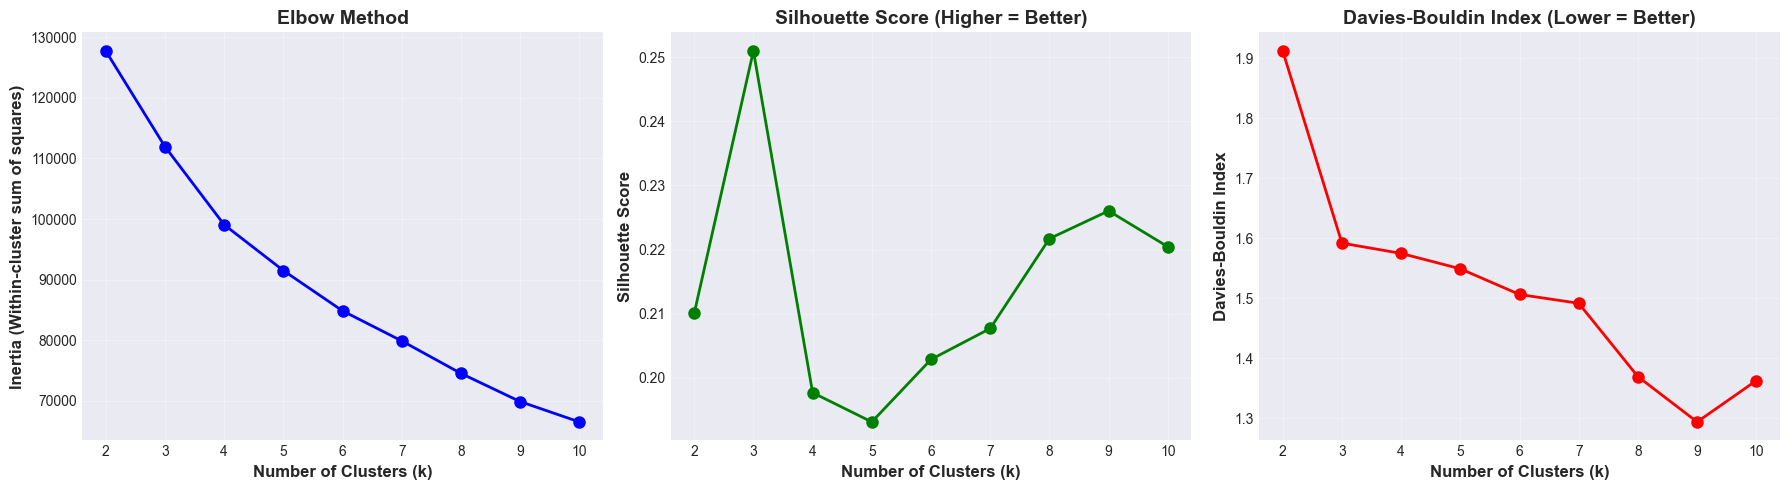


Optimal number of clusters based on Silhouette Score: 3
Best Silhouette Score: 0.2510


In [6]:
# Elbow Method and Silhouette Score
inertias = []
silhouette_scores = []
davies_bouldin_scores = []
K_range = range(2, 11)

print("Testing different numbers of clusters...")
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))
    davies_bouldin_scores.append(davies_bouldin_score(df_scaled, kmeans.labels_))
    
    print(f"k={k}: Inertia={kmeans.inertia_:.2f}, Silhouette={silhouette_scores[-1]:.4f}, Davies-Bouldin={davies_bouldin_scores[-1]:.4f}")

# Visualize metrics
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Elbow plot
axes[0].plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('Number of Clusters (k)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Inertia (Within-cluster sum of squares)', fontsize=12, fontweight='bold')
axes[0].set_title('Elbow Method', fontsize=14, fontweight='bold')
axes[0].grid(alpha=0.3)

# Silhouette score (higher is better)
axes[1].plot(K_range, silhouette_scores, 'go-', linewidth=2, markersize=8)
axes[1].set_xlabel('Number of Clusters (k)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Silhouette Score', fontsize=12, fontweight='bold')
axes[1].set_title('Silhouette Score (Higher = Better)', fontsize=14, fontweight='bold')
axes[1].grid(alpha=0.3)

# Davies-Bouldin score (lower is better)
axes[2].plot(K_range, davies_bouldin_scores, 'ro-', linewidth=2, markersize=8)
axes[2].set_xlabel('Number of Clusters (k)', fontsize=12, fontweight='bold')
axes[2].set_ylabel('Davies-Bouldin Index', fontsize=12, fontweight='bold')
axes[2].set_title('Davies-Bouldin Index (Lower = Better)', fontsize=14, fontweight='bold')
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Find optimal k based on silhouette score
optimal_k = K_range[np.argmax(silhouette_scores)]
print(f"\n{'='*80}")
print(f"Optimal number of clusters based on Silhouette Score: {optimal_k}")
print(f"Best Silhouette Score: {max(silhouette_scores):.4f}")
print(f"{'='*80}")

## 6. Train K-Means with Optimal Clusters

In [7]:
# Train final K-Means model
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans_final.fit_predict(df_scaled)

# Add cluster labels to original dataframe
df_imputed['Cluster'] = clusters

print("="*80)
print("K-MEANS CLUSTERING RESULTS")
print("="*80)
print(f"Number of clusters: {optimal_k}")
print(f"Silhouette Score: {silhouette_score(df_scaled, clusters):.4f}")
print(f"Davies-Bouldin Index: {davies_bouldin_score(df_scaled, clusters):.4f}")
print(f"Calinski-Harabasz Score: {calinski_harabasz_score(df_scaled, clusters):.4f}")
print("\nCluster distribution:")
print(df_imputed['Cluster'].value_counts().sort_index())
print("="*80)

K-MEANS CLUSTERING RESULTS
Number of clusters: 3
Silhouette Score: 0.2510
Davies-Bouldin Index: 1.5920
Calinski-Harabasz Score: 1605.0264

Cluster distribution:
Cluster
0    1275
1    6114
2    1561
Name: count, dtype: int64
Silhouette Score: 0.2510
Davies-Bouldin Index: 1.5920
Calinski-Harabasz Score: 1605.0264

Cluster distribution:
Cluster
0    1275
1    6114
2    1561
Name: count, dtype: int64


## 7. Cluster Profiling and Interpretation

CLUSTER PROFILES (Mean values)
         BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
Cluster                                                            
0        2182.35               0.98    4187.02           2664.00   
1         807.72               0.83     496.06            247.27   
2        4023.79               0.96     389.05            252.33   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
Cluster                                                              
0                       1523.49        449.75                 0.95   
1                        249.11        339.00                 0.46   
2                        136.80       3917.25                 0.23   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
Cluster                                                                 
0                              0.66                              0.74   
1                              0.13                       

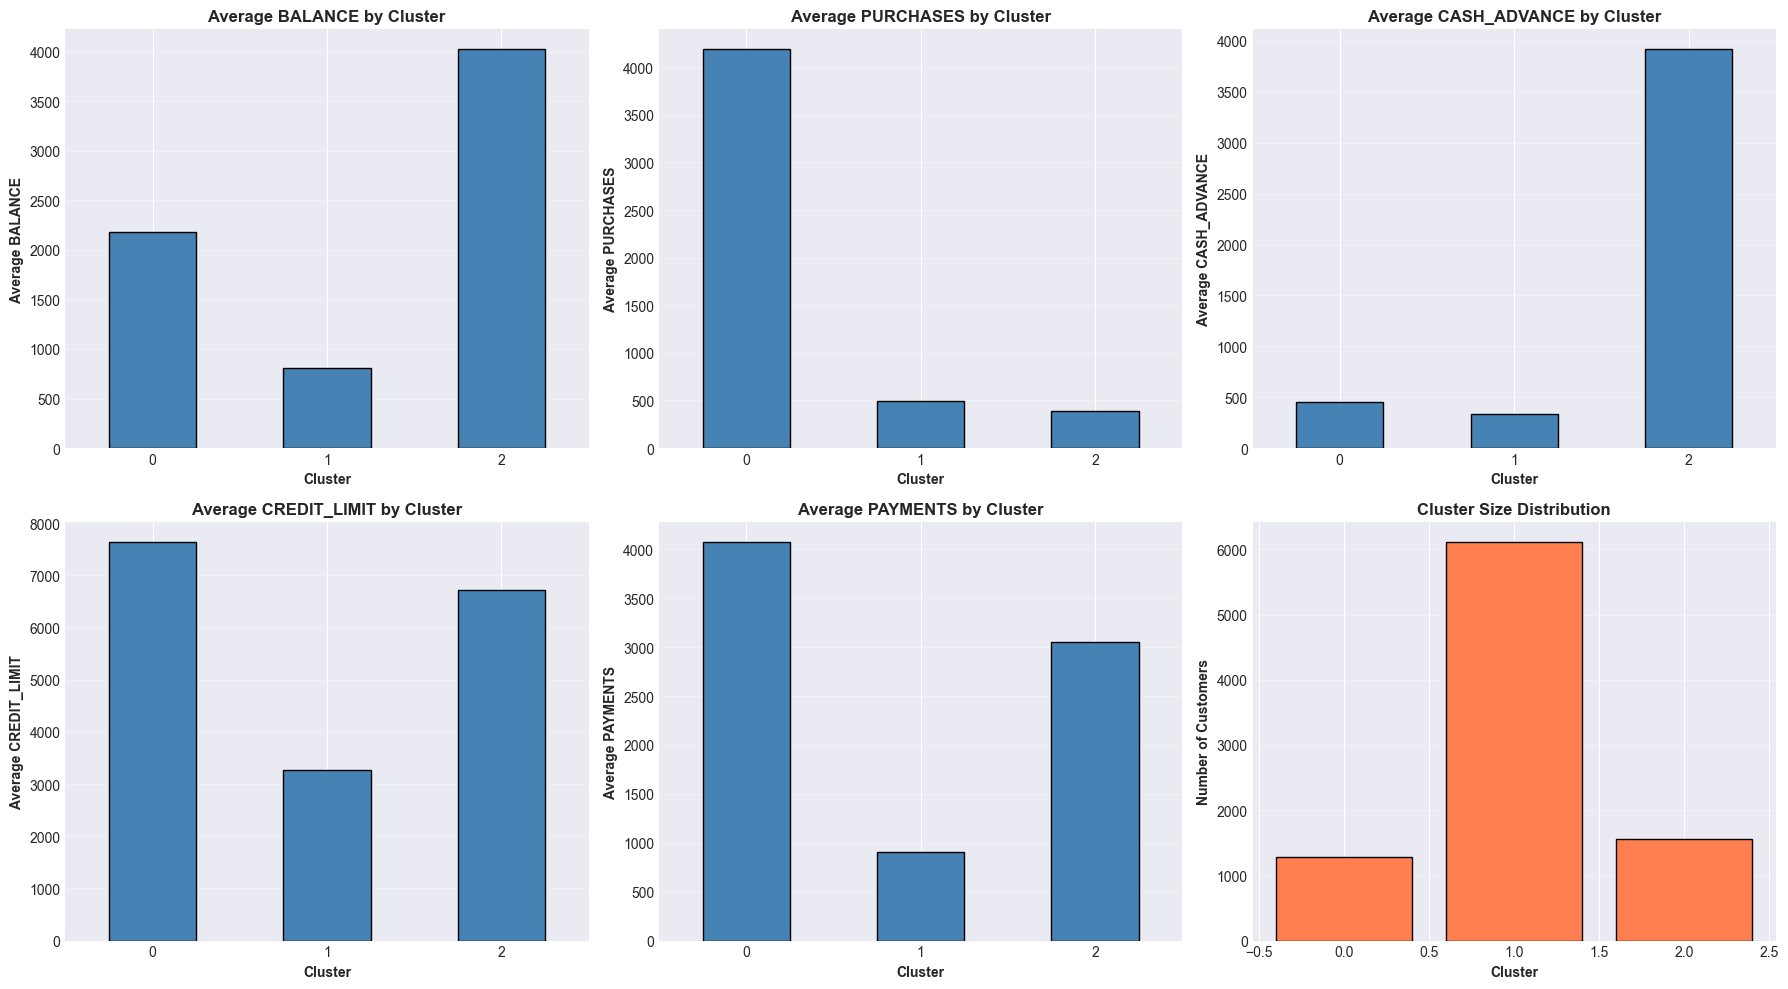

In [8]:
# Calculate mean values for each cluster
cluster_profile = df_imputed.groupby('Cluster').mean()

print("="*80)
print("CLUSTER PROFILES (Mean values)")
print("="*80)
print(cluster_profile.round(2))
print("="*80)

# Visualize cluster profiles for key features
key_features_profile = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, feature in enumerate(key_features_profile):
    if feature in cluster_profile.columns:
        cluster_profile[feature].plot(kind='bar', ax=axes[idx], color='steelblue', edgecolor='black')
        axes[idx].set_title(f'Average {feature} by Cluster', fontweight='bold', fontsize=12)
        axes[idx].set_xlabel('Cluster', fontweight='bold')
        axes[idx].set_ylabel(f'Average {feature}', fontweight='bold')
        axes[idx].grid(alpha=0.3, axis='y')
        axes[idx].tick_params(axis='x', rotation=0)

# Cluster size distribution
axes[5].bar(df_imputed['Cluster'].value_counts().sort_index().index,
            df_imputed['Cluster'].value_counts().sort_index().values,
            color='coral', edgecolor='black')
axes[5].set_title('Cluster Size Distribution', fontweight='bold', fontsize=12)
axes[5].set_xlabel('Cluster', fontweight='bold')
axes[5].set_ylabel('Number of Customers', fontweight='bold')
axes[5].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

## 8. Visualize Clusters with PCA

Explained variance by 2 components: 47.61%
PC1 variance: 27.30%
PC2 variance: 20.31%


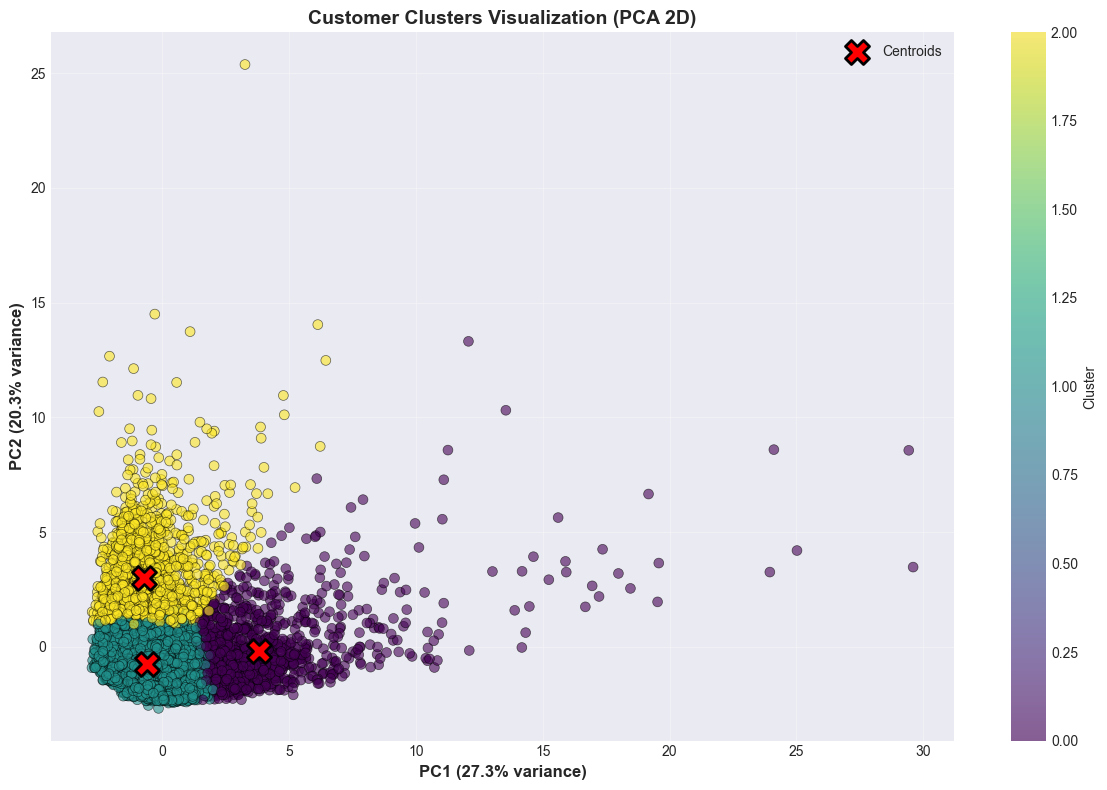

In [9]:
# Apply PCA for visualization (reduce to 2D)
pca = PCA(n_components=2, random_state=42)
principal_components = pca.fit_transform(df_scaled)

# Create dataframe with PCA components
pca_df = pd.DataFrame(
    data=principal_components,
    columns=['PC1', 'PC2']
)
pca_df['Cluster'] = clusters

print(f"Explained variance by 2 components: {pca.explained_variance_ratio_.sum():.2%}")
print(f"PC1 variance: {pca.explained_variance_ratio_[0]:.2%}")
print(f"PC2 variance: {pca.explained_variance_ratio_[1]:.2%}")

# Visualize clusters in 2D
plt.figure(figsize=(12, 8))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], 
                     c=pca_df['Cluster'], 
                     cmap='viridis', 
                     s=50, 
                     alpha=0.6,
                     edgecolors='black',
                     linewidth=0.5)

# Plot cluster centers
pca_centers = pca.transform(kmeans_final.cluster_centers_)
plt.scatter(pca_centers[:, 0], pca_centers[:, 1],
           c='red', marker='X', s=300, 
           edgecolors='black', linewidth=2,
           label='Centroids')

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)', fontsize=12, fontweight='bold')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)', fontsize=12, fontweight='bold')
plt.title('Customer Clusters Visualization (PCA 2D)', fontsize=14, fontweight='bold')
plt.colorbar(scatter, label='Cluster')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## 9. Cluster Interpretation and Business Insights

In [20]:
# Detailed cluster interpretation
print("="*80)
print("CLUSTER INTERPRETATION")
print("="*80)

for cluster_id in sorted(df_imputed['Cluster'].unique()):
    cluster_data = df_imputed[df_imputed['Cluster'] == cluster_id]
    
    print(f"\n{'='*80}")
    print(f"CLUSTER {cluster_id} (n={len(cluster_data)} customers, {len(cluster_data)/len(df_imputed)*100:.1f}%)")
    print(f"{'='*80}")
    
    # Key characteristics
    print(f"Average Balance: ${cluster_data['BALANCE'].mean():.2f}")
    print(f"Average Purchases: ${cluster_data['PURCHASES'].mean():.2f}")
    print(f"Average Cash Advance: ${cluster_data['CASH_ADVANCE'].mean():.2f}")
    print(f"Average Credit Limit: ${cluster_data['CREDIT_LIMIT'].mean():.2f}")
    print(f"Average Payments: ${cluster_data['PAYMENTS'].mean():.2f}")
    print(f"Average Tenure: {cluster_data['TENURE'].mean():.1f} months")
    
    if 'PRC_FULL_PAYMENT' in cluster_data.columns:
        print(f"Full Payment Rate: {cluster_data['PRC_FULL_PAYMENT'].mean():.2%}")

print("\n" + "="*80)
print("✓ Clustering analysis completed successfully!")
print("="*80)

CLUSTER INTERPRETATION


KeyError: 'Cluster'

In [ ]:
# Detailed cluster interpretation
print("="*80)
print("CLUSTER INTERPRETATION")
print("="*80)

for cluster_id in sorted(df_imputed['Cluster'].unique()):
    cluster_data = df_imputed[df_imputed['Cluster'] == cluster_id]
    
    print(f"\n{'='*80}")
    print(f"CLUSTER {cluster_id} (n={len(cluster_data)} customers, {len(cluster_data)/len(df_imputed)*100:.1f}%)")
    print(f"{'='*80}")
    
    # Key characteristics
    print(f"Average Balance: ${cluster_data['BALANCE'].mean():.2f}")
    print(f"Average Purchases: ${cluster_data['PURCHASES'].mean():.2f}")
    print(f"Average Cash Advance: ${cluster_data['CASH_ADVANCE'].mean():.2f}")
    print(f"Average Credit Limit: ${cluster_data['CREDIT_LIMIT'].mean():.2f}")
    print(f"Average Payments: ${cluster_data['PAYMENTS'].mean():.2f}")
    print(f"Average Tenure: {cluster_data['TENURE'].mean():.1f} months")
    
    if 'PRC_FULL_PAYMENT' in cluster_data.columns:
        print(f"Full Payment Rate: {cluster_data['PRC_FULL_PAYMENT'].mean():.2%}")

print("\n" + "="*80)
print("✓ Clustering analysis completed successfully!")
print("="*80)

CLUSTER INTERPRETATION

CLUSTER 0 (n=1275 customers, 14.2%)
Average Balance: $2182.35
Average Purchases: $4187.02
Average Cash Advance: $449.75
Average Credit Limit: $7642.78
Average Payments: $4075.53
Average Tenure: 11.9 months
Full Payment Rate: 29.88%

CLUSTER 1 (n=6114 customers, 68.3%)
Average Balance: $807.72
Average Purchases: $496.06
Average Cash Advance: $339.00
Average Credit Limit: $3267.02
Average Payments: $907.45
Average Tenure: 11.5 months
Full Payment Rate: 15.41%

CLUSTER 2 (n=1561 customers, 17.4%)
Average Balance: $4023.79
Average Purchases: $389.05
Average Cash Advance: $3917.25
Average Credit Limit: $6729.47
Average Payments: $3053.94
Average Tenure: 11.4 months
Full Payment Rate: 3.37%

✓ Clustering analysis completed successfully!


### Ringkasan Hasil Clustering

**Model yang Digunakan**: K-Means Clustering

**Jumlah Cluster Optimal**: 3 cluster (berdasarkan Silhouette Score tertinggi)

**Metrik Evaluasi**:
- Silhouette Score: **0.251** (menunjukkan pemisahan cluster yang cukup baik)
- Davies-Bouldin Index: **1.592** (semakin rendah semakin baik)
- Calinski-Harabasz Score: **1605.03** (semakin tinggi semakin baik)

---

### Karakteristik Setiap Cluster

#### **Cluster 0: "High-Value Active Shoppers"** (14.2% customers, n=1,275)

**Profil**:
- Balance rata-rata: $2,182 (menengah)
- Purchases tertinggi: $4,187 (sangat aktif berbelanja)
- Cash Advance terendah: $450 (jarang tarik tunai)
- Credit Limit: $7,643 (tinggi)
- Full Payment Rate: 29.88% (tertinggi)

**Interpretasi**:
Ini adalah **customer premium** yang aktif berbelanja menggunakan kartu kredit dan memiliki perilaku pembayaran yang baik. Mereka jarang menggunakan cash advance dan cenderung membayar penuh setiap bulannya. Kelompok ini paling menguntungkan dari segi fee transaksi.

**Rekomendasi Bisnis**:
- Target untuk program loyalty dan rewards
- Tawarkan limit kredit lebih tinggi
- Promosi cashback untuk pembelian
- Pertahankan dengan benefit eksklusif

---

#### **Cluster 1: "Budget-Conscious Users"** (68.3% customers, n=6,114)

**Profil**:
- Balance rata-rata: $808 (rendah)
- Purchases terendah: $496 (sangat jarang belanja)
- Cash Advance: $339 (rendah)
- Credit Limit terendah: $3,267 (konservatif)
- Full Payment Rate: 15.41% (menengah)

**Interpretasi**:
Ini adalah **mayoritas customer** dengan aktivitas rendah dan spending minimal. Mereka memiliki balance rendah, jarang berbelanja, dan credit limit terbatas. Kelompok ini mungkin menggunakan kartu sebagai backup atau untuk kebutuhan darurat saja. Kontribusi revenue paling kecil namun risiko default juga rendah.

**Rekomendasi Bisnis**:
- Aktivasi campaign untuk meningkatkan usage
- Promosi tanpa annual fee
- Penawaran cicilan 0% untuk mendorong transaksi
- Cross-sell produk perbankan lain (tabungan, deposito)

---

#### **Cluster 2: "Cash Advance Heavy Users"** (17.4% customers, n=1,561)

**Profil**:
- Balance tertinggi: $4,024 (sangat tinggi)
- Purchases terendah: $389 (hampir tidak belanja)
- Cash Advance tertinggi: $3,917 (sangat sering tarik tunai)
- Credit Limit: $6,729 (tinggi)
- Full Payment Rate terendah: 3.37% (hampir tidak pernah bayar penuh)

**Interpretasi**:
Ini adalah **customer berisiko tinggi** yang menggunakan kartu kredit terutama untuk cash advance dengan balance tinggi dan pembayaran minimal. Mereka jarang berbelanja tapi sering tarik tunai, mengindikasikan kemungkinan kesulitan keuangan. Meskipun menghasilkan bunga tinggi, risiko default juga sangat tinggi.

**Rekomendasi Bisnis**:
- **Monitoring ketat** untuk menghindari bad debt
- Batasi limit cash advance
- Program edukasi keuangan
- Penawaran konversi cash advance ke personal loan dengan bunga lebih rendah
- Early warning system untuk deteksi dini gagal bayar

---

### Perbandingan Antar Cluster

| Metrik | Cluster 0 (High-Value) | Cluster 1 (Budget) | Cluster 2 (Cash Heavy) |
|--------|----------------------|-------------------|----------------------|
| **Ukuran** | 14.2% | 68.3% | 17.4% |
| **Purchases** | $4,187 ⬆️ | $496 ⬇️ | $389 ⬇️ |
| **Cash Advance** | $450 ⬇️ | $339 ⬇️ | $3,917 ⬆️ |
| **Balance** | $2,182 | $808 ⬇️ | $4,024 ⬆️ |
| **Full Payment** | 29.88% ⬆️ | 15.41% | 3.37% ⬇️ |
| **Credit Limit** | $7,643 ⬆️ | $3,267 ⬇️ | $6,729 |
| **Revenue Potential** | Tinggi ✅ | Rendah | Tinggi tapi Berisiko ⚠️ |
| **Default Risk** | Rendah ✅ | Rendah ✅ | Tinggi ⚠️ |

---

### Analisis Pemilihan Metode

**Mengapa K-Means?**
1. **Sederhana dan cepat**: Cocok untuk dataset besar (8,950 customers)
2. **Interpretable**: Cluster center mudah dipahami untuk profiling
3. **Scalable**: Efisien untuk data numerik dengan StandardScaler

**Silhouette Score 0.251 (Moderat)**:
- Tidak terlalu tinggi karena **overlap behavior** antar customer
- Beberapa customer di boundary antara Budget-Conscious dan Cash Heavy
- Masih acceptable untuk clustering task dengan banyak fitur (17 features)

**Pemilihan k=3**:
- Elbow method menunjukkan penurunan inertia mulai landai di k=3
- Silhouette score tertinggi di k=3
- Davies-Bouldin Index cukup rendah (1.592)
- Interpretasi bisnis paling jelas dengan 3 segmen

---

### Validasi dan Keterbatasan

**Kekuatan**:
✅ Cluster memiliki karakteristik yang jelas dan berbeda
✅ Distribusi cluster cukup seimbang (tidak ada cluster terlalu kecil)
✅ Profil setiap cluster dapat diterjemahkan ke actionable business insights
✅ Preprocessing (imputation, scaling) dilakukan dengan benar

**Keterbatasan**:
⚠️ Silhouette score moderat (0.251) menunjukkan masih ada overlap
⚠️ K-Means mengasumsikan cluster berbentuk spherical (bisa kurang cocok untuk data kompleks)
⚠️ Sensitif terhadap outliers (meskipun sudah pakai median imputation)
⚠️ Hanya mencoba K-Means, belum compare dengan Hierarchical atau DBSCAN

---

### Rekomendasi Pengembangan Lebih Lanjut

**Immediate Actions**:
1. **A/B Testing**: Implementasi strategi berbeda per cluster dan ukur performa
2. **Monitoring**: Track pergerakan customer antar cluster setiap bulan
3. **Personalisasi**: Sesuaikan komunikasi marketing berdasarkan cluster

**Model Improvement**:
1. **Try Other Algorithms**:
   - Hierarchical Clustering untuk melihat dendogram dan sub-segmentasi
   - DBSCAN untuk deteksi outliers dan cluster non-spherical
   - Gaussian Mixture Model untuk soft clustering

2. **Feature Engineering**:
   - Ratio features (e.g., Purchases/Credit_Limit, Cash_Advance/Balance)
   - Time-based features (trend 3 bulan terakhir)
   - Categorical encoding jika ada data demografis

3. **Hyperparameter Tuning**:
   - Coba k=4 atau k=5 untuk segmentasi lebih detail
   - Experiment dengan different initialization methods

4. **Validation**:
   - Cross-validation dengan bootstrapping
   - Stability analysis (run multiple times, check consistency)

---

### Kesimpulan Akhir

Pipeline clustering end-to-end telah **berhasil diimplementasikan** untuk segmentasi customer kartu kredit. Tiga cluster yang dihasilkan memiliki karakteristik yang jelas:

1. **Cluster 0 (14.2%)**: High-value shoppers yang menguntungkan ✅
2. **Cluster 1 (68.3%)**: Budget-conscious users dengan aktivitas minimal 
3. **Cluster 2 (17.4%)**: Cash advance heavy users yang berisiko tinggi ⚠️

Hasil clustering ini dapat **langsung diaplikasikan** untuk:
- Strategi marketing yang dipersonalisasi
- Risk management dan credit limit adjustment
- Customer retention program
- Product development sesuai kebutuhan segmen

Model K-Means dengan k=3 memberikan **trade-off terbaik** antara kesederhanaan, interpretabilitas, dan kualitas clustering (Silhouette Score 0.251). Untuk implementasi production, disarankan melakukan monitoring berkala dan iterasi model dengan algoritma lain untuk perbandingan.